In [15]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Import data file into notebook
data = pd.read_csv("../Data/forestfires.csv")

## Column descriptions:
x = x-axis spatial coordinate within the Montesinho park map: 1 to 9\
y = y-axis spatial coordinate within the Montesinho park map: 2 to 9\
month = month of the year: "jan" to "dec"\
day = day of the week: "mon" to "sun"\
FFMC = index from the FWI system: 18.7 to 96.20-The Fine Fuel Moisture Code is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.\
DMC = DMC index from the FWI system: 1.1 to 291.3- The Duff Moisture Code is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in duff layers (2-4 inches) deep and medium-sized woody material.)\
ISI = ISI index from the FWI system: 0.0 to 56.10-numeric rating of the expected rate of fire spread\
temp = temperature in Celsius degrees: 2.2 to 33.30\
RH = relative humidity in %: 15.0 to 100\
wind = wind speed in km/h: 0.40 to 9.40\
rain = outside rain in mm/m2 : 0.0 to 6.4\
area = the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0)

In [17]:
#preview dataset 
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [18]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [19]:
data.shape

(517, 13)

In [20]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [21]:
#Preview dataframe columns
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [22]:
#Check number of unique values per column
data.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [24]:
#check for the sum of all null values
data.isnull().sum()

#no null values within this dataset

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [25]:
#Check for duplicate values
data.duplicated().sum()

#Remove duplicate rows/data

4

In [26]:
#drop duplicated columns
clean_data = data.drop_duplicates()

#Check to see 4 duplicate rows were removed
clean_data.shape

(513, 13)

In [27]:
clean_data.describe(include=['O'])

,month,day
count,513,513
unique,12,7
top,aug,sun
freq,182,94


In [29]:
#Change days of week from Sun-Sat to 1-7.

clean_data.loc[data['day']=='sun', 'day'] = '1' 
clean_data.loc[data['day']=='mon', 'day'] = '2'
clean_data.loc[data['day']=='tue', 'day'] = '3'
clean_data.loc[data['day']=='wed', 'day'] = '4' 
clean_data.loc[data['day']=='thu', 'day'] = '5' 
clean_data.loc[data['day']=='fri', 'day'] = '6' 
clean_data.loc[data['day']=='sat', 'day'] = '7' 


#Change months of year from 1-12.
clean_data.loc[data['month']=='jan', 'month'] = '1' 
clean_data.loc[data['month']=='feb', 'month'] = '2'
clean_data.loc[data['month']=='mar', 'month'] = '3'
clean_data.loc[data['month']=='apr', 'month'] = '4' 
clean_data.loc[data['month']=='may', 'month'] = '5' 
clean_data.loc[data['month']=='jun', 'month'] = '6' 
clean_data.loc[data['month']=='jul', 'month'] = '7' 
clean_data.loc[data['month']=='aug', 'month'] = '8' 
clean_data.loc[data['month']=='sep', 'month'] = '9' 
clean_data.loc[data['month']=='oct', 'month'] = '10' 
clean_data.loc[data['month']=='nov', 'month'] = '11' 
clean_data.loc[data['month']=='dec', 'month'] = '12' 

#check to see changes were made
clean_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [30]:
#change datatype for day and month column to interger
clean_data = clean_data.astype({"day": int})
clean_data = clean_data.astype({"month": int})

In [31]:
clean_data.dtypes

X          int64
Y          int64
month      int32
day        int32
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

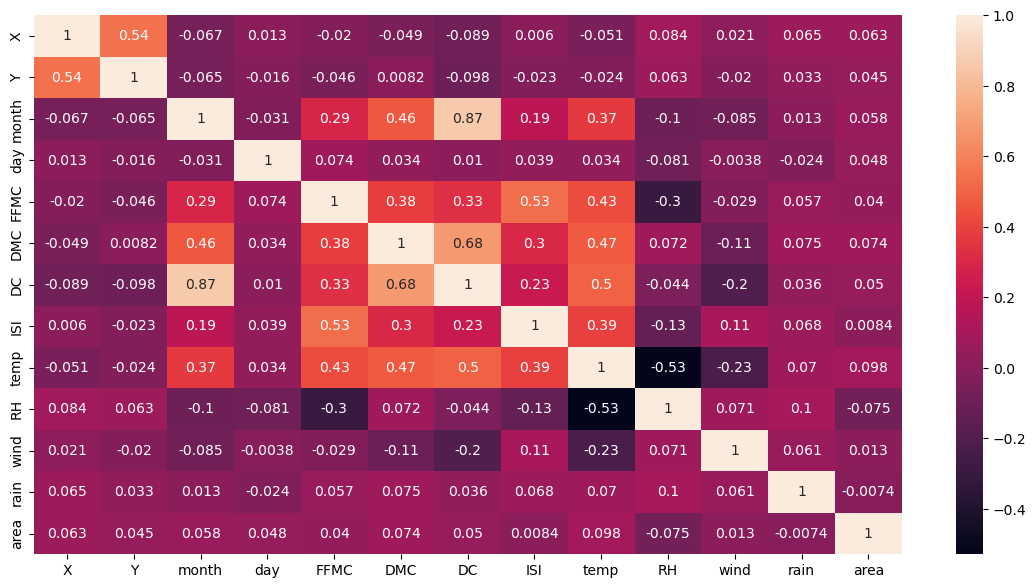

In [124]:
#Relationship analysis
#correlation analysis

#Another way to make the heatmap
sns.heatmap(clean_data.corr(), annot = True) 
plt.rcParams['figure.figsize'] = (14, 7) #can change font size here

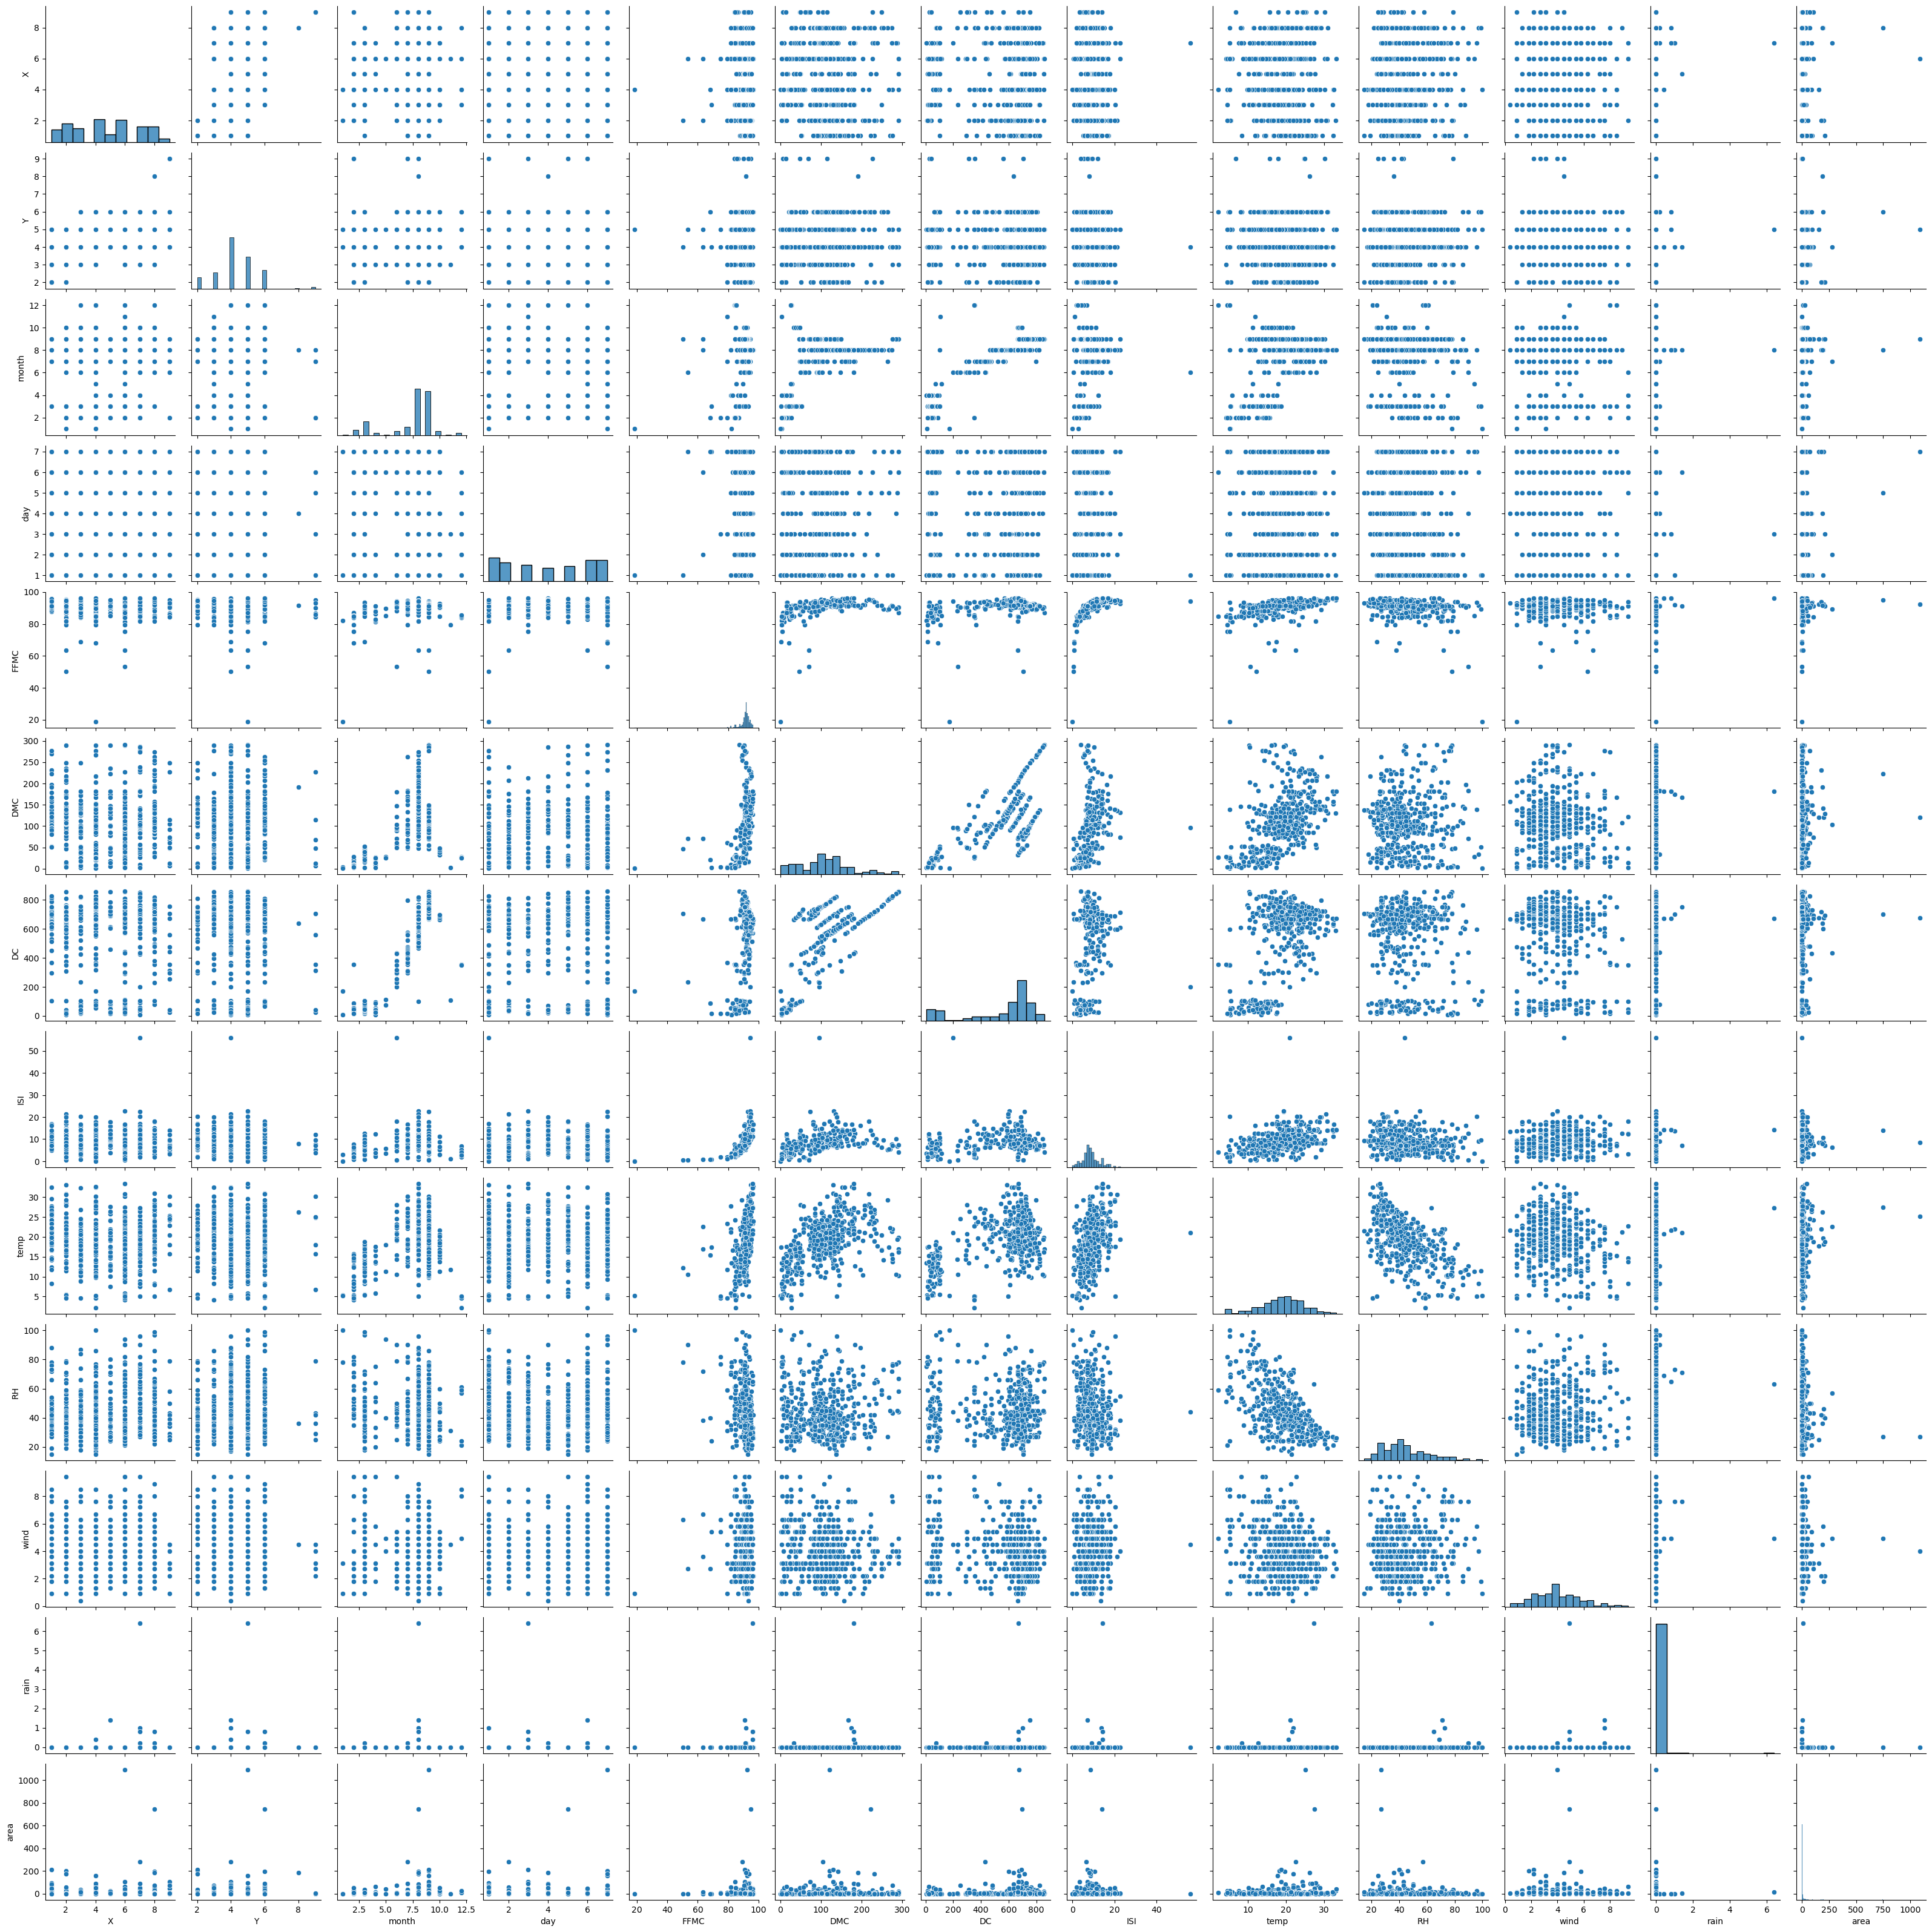

In [34]:
sns.pairplot(clean_data)

<Axes: >

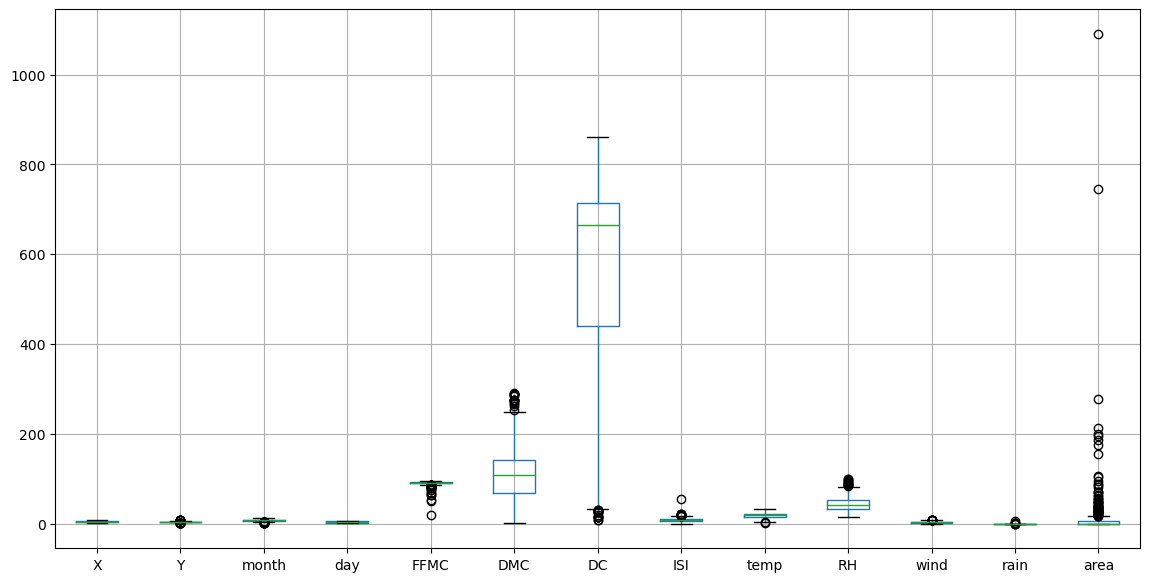

In [35]:
#look for outliers
clean_data.boxplot()

In [ ]:
#columns x, y, month, day are all expected. Look into FFMC, DMC, DC, ISI, temp, RH, wind, rain, area
sns.histplot(clean_data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
379,4,5,1,1,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.0


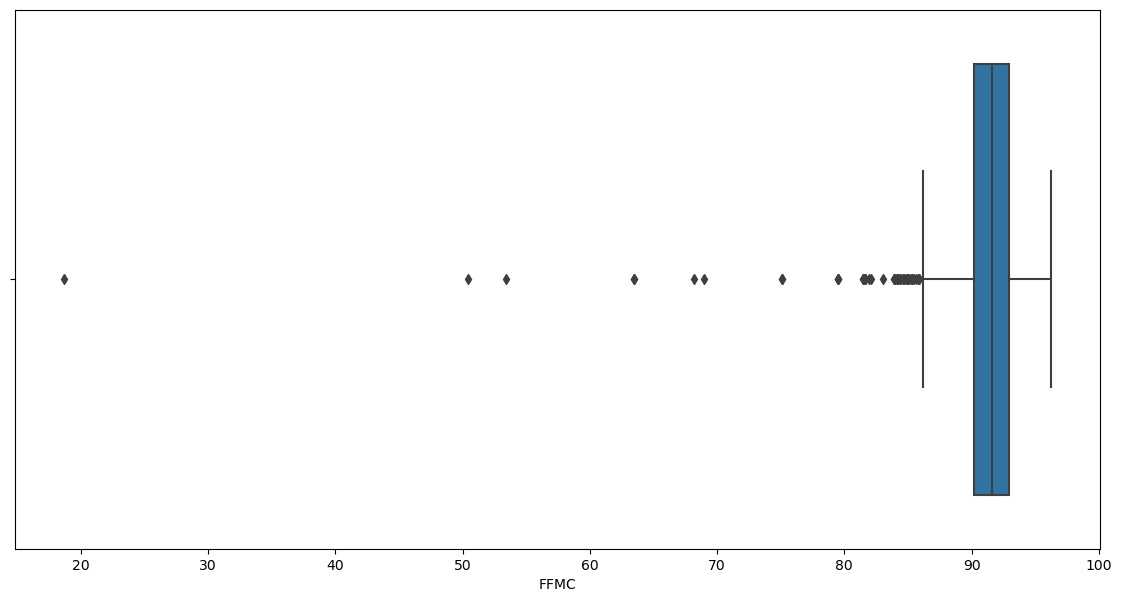

In [60]:
#Make seperate histograms to see distribution
sns.boxplot(data= clean_data, x ='FFMC') 

#Look into outlier point
clean_data.loc[clean_data['FFMC']<30]

<Axes: xlabel='DMC'>

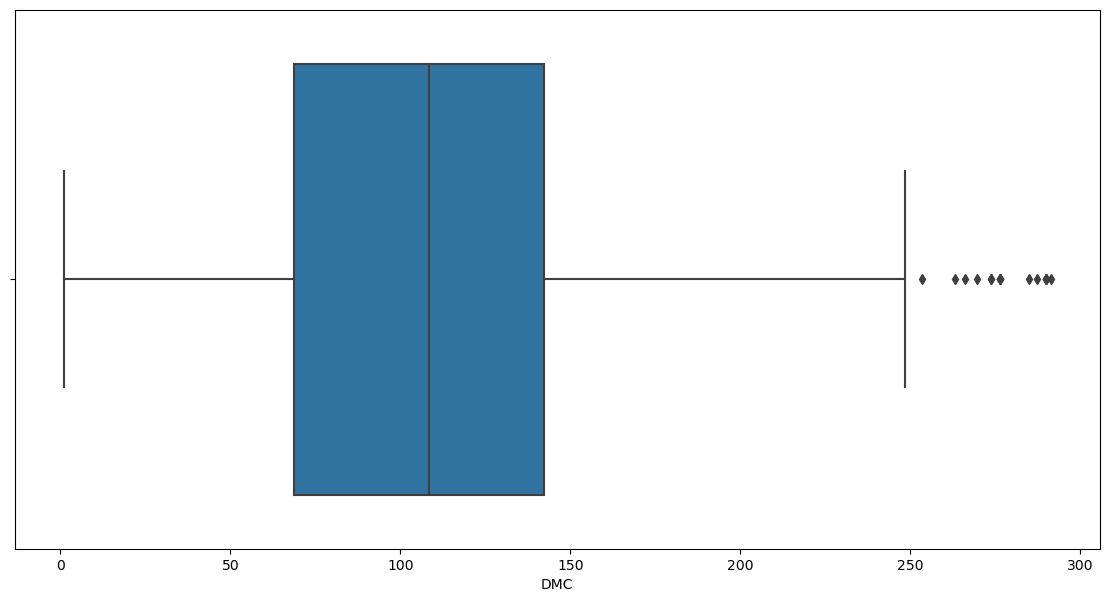

In [61]:
sns.boxplot(data= clean_data, x= 'DMC') 

<Axes: xlabel='DC'>

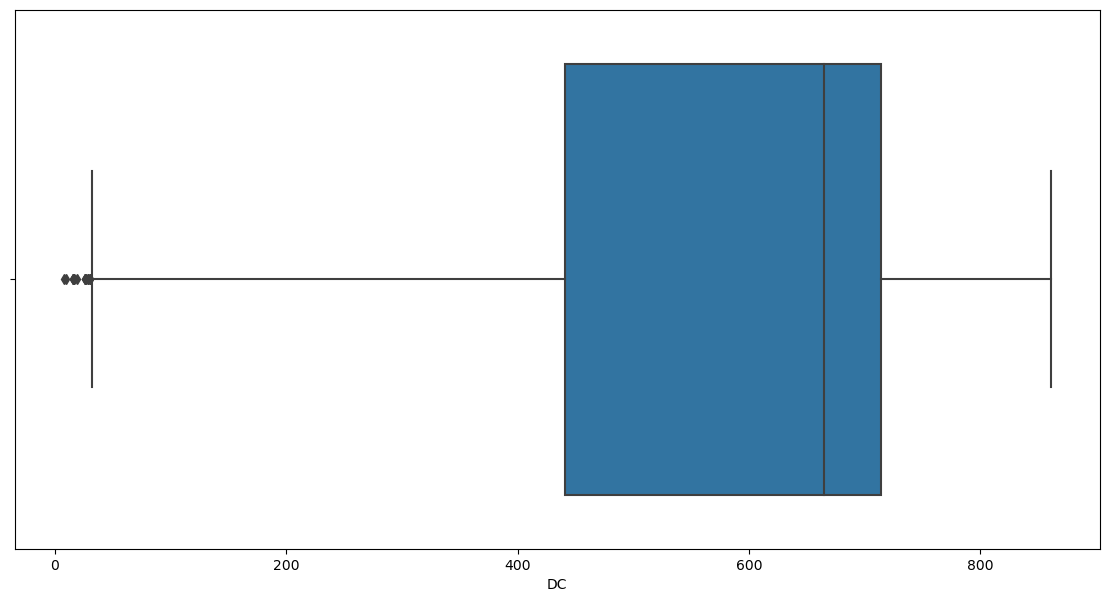

In [62]:
sns.boxplot(data= clean_data, x ='DC') 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
22,7,4,6,1,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.0


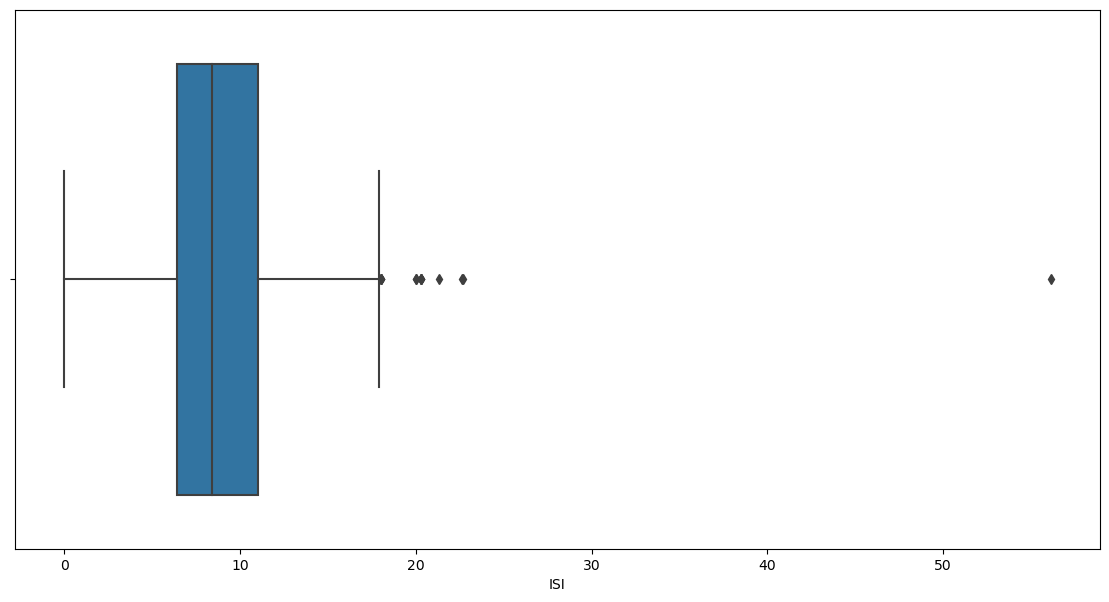

In [64]:
sns.boxplot(data= clean_data, x ='ISI') 

#Look into outlier point
clean_data.loc[clean_data['ISI']>30]

<Axes: xlabel='RH'>

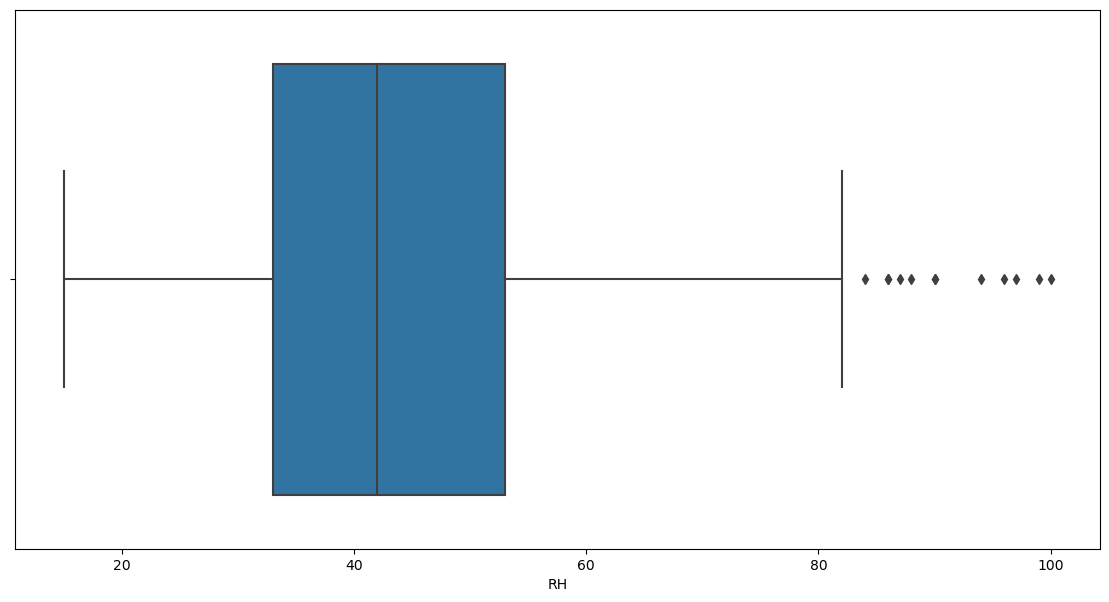

In [65]:
sns.boxplot(data= clean_data, x ='RH') 

<Axes: xlabel='wind'>

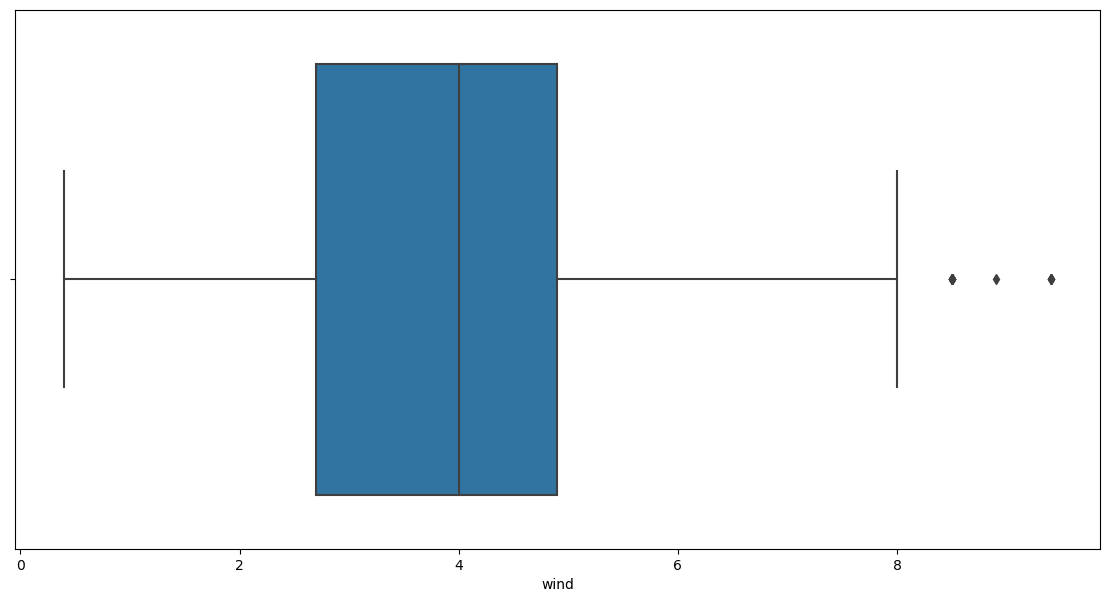

In [66]:
sns.boxplot(data= clean_data, x= 'wind') 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
499,7,5,8,3,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82


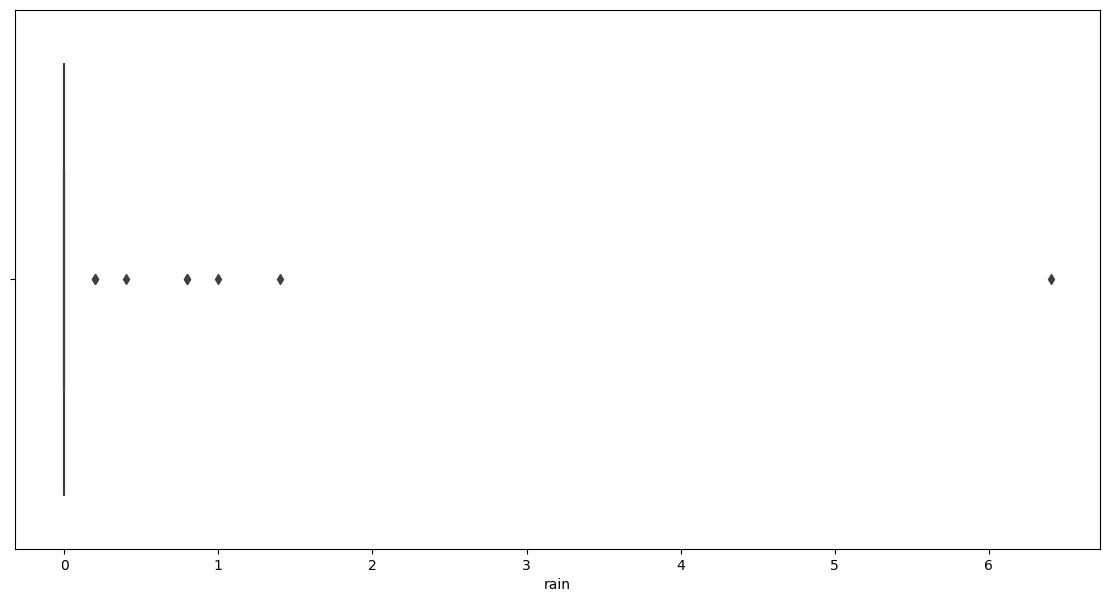

In [73]:
sns.boxplot(data= clean_data, x ='rain') 

#look into outlier
clean_data.loc[clean_data['rain']>6]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,9,7,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84


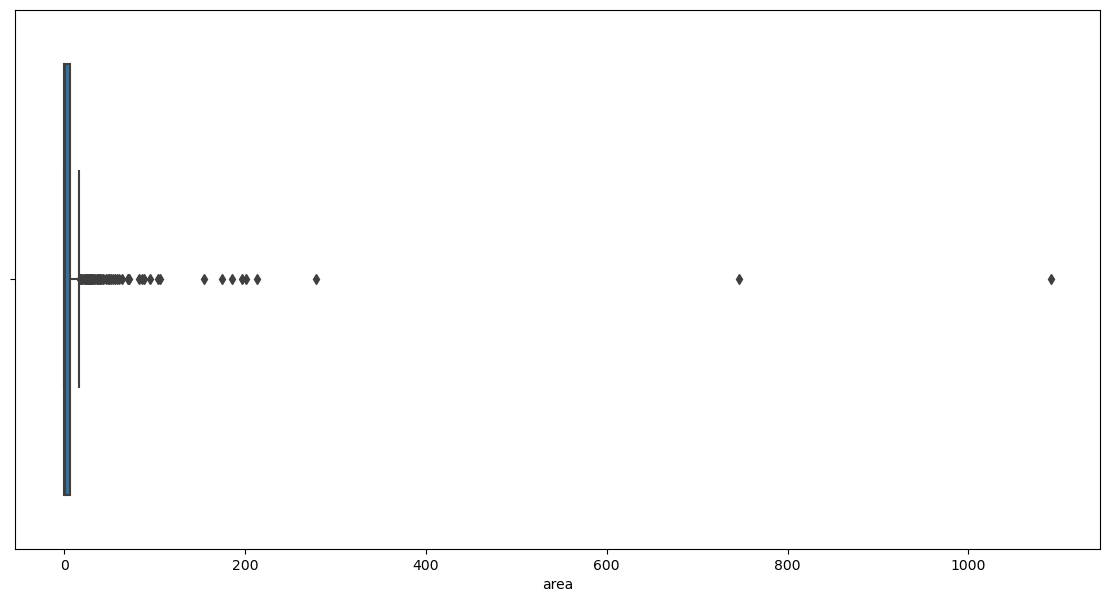

In [75]:
sns.boxplot(data= clean_data, x= 'area') 

#look into outlier
clean_data.loc[clean_data['area']>1000]

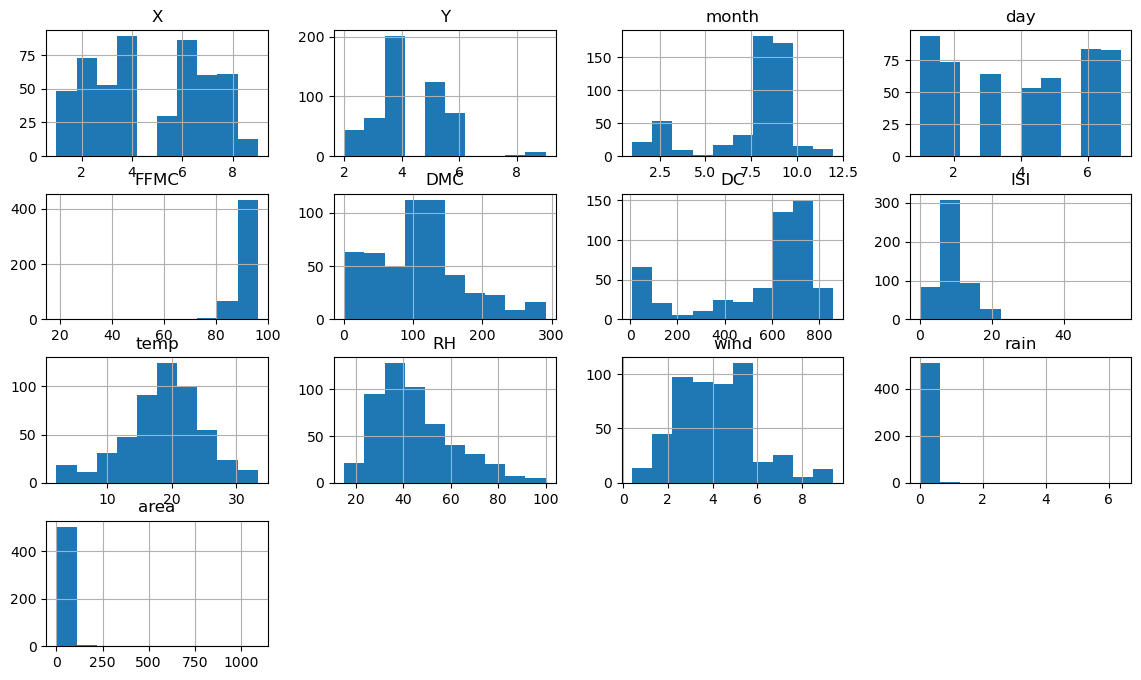

In [92]:
#Quick histogram overview
clean_data.hist(figsize=(14, 8))  
plt.show()

<Axes: xlabel='month', ylabel='Count'>

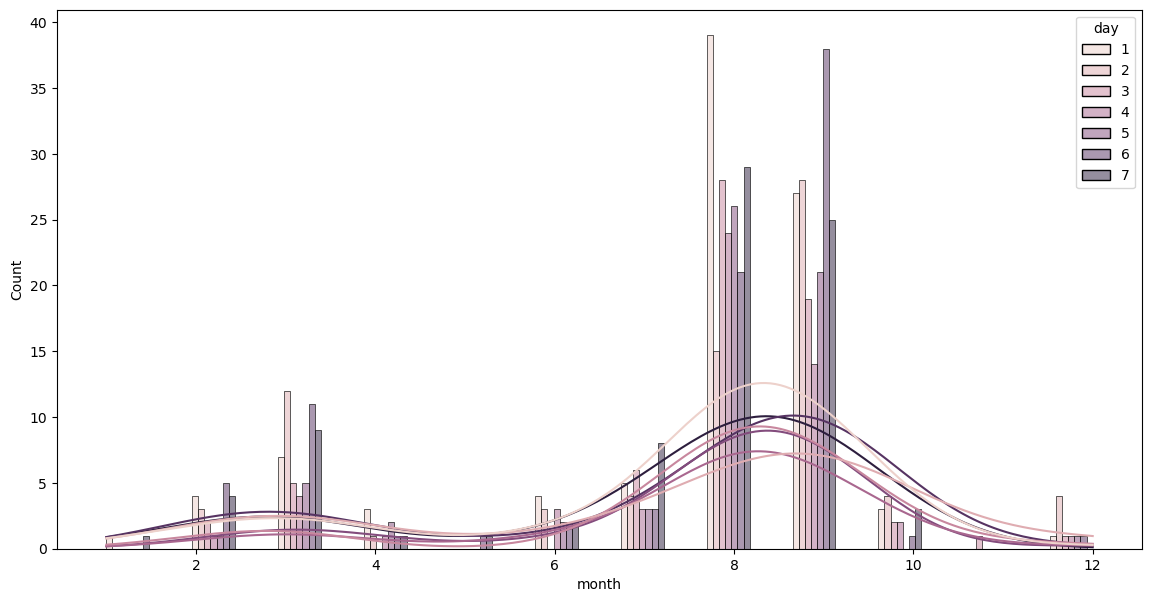

In [46]:
#Histogram for month
sns.histplot(data=clean_data, x="month", kde=True, hue = 'day', multiple="dodge")

<Axes: xlabel='day', ylabel='Count'>

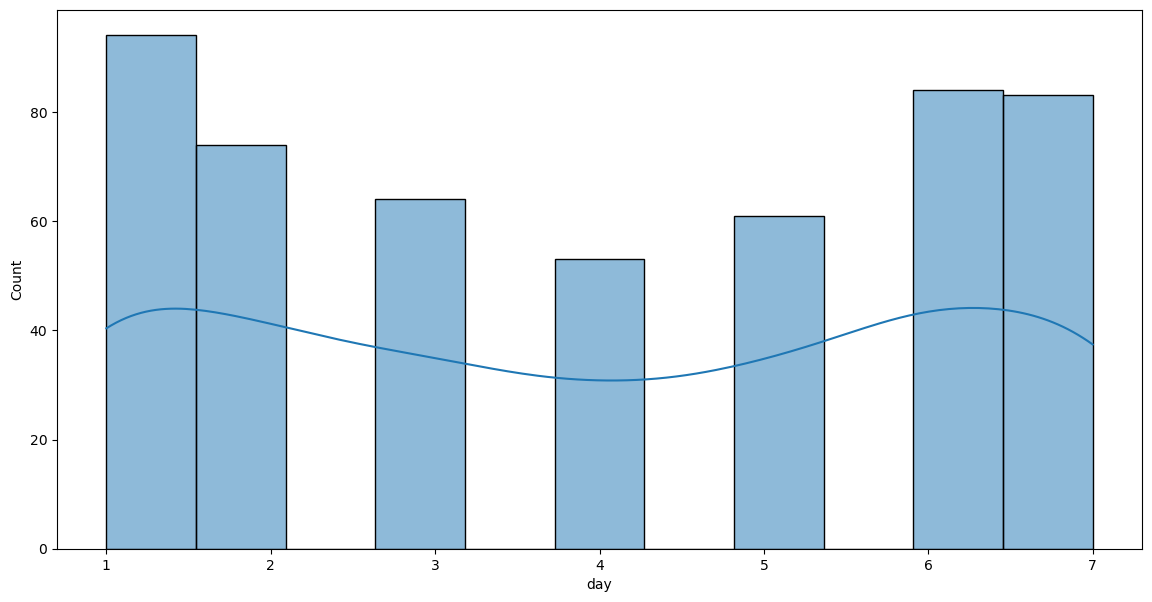

In [47]:
#Histogram for day
sns.histplot(data=clean_data, x="day", kde=True)

<Axes: xlabel='area', ylabel='Count'>

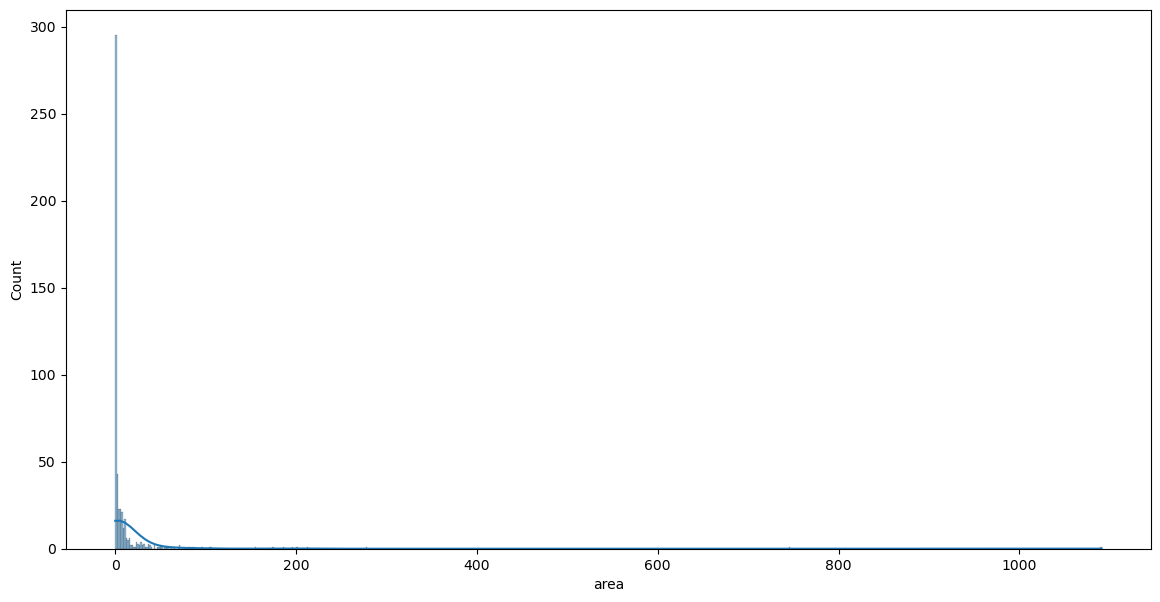

In [44]:
#Histogram for area
sns.histplot(data=clean_data, x="area", kde=True)

C:\Users\UltimateKayCorp\AppData\Local\Temp\ipykernel_18256\1807305405.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="month", y="area", size="area",


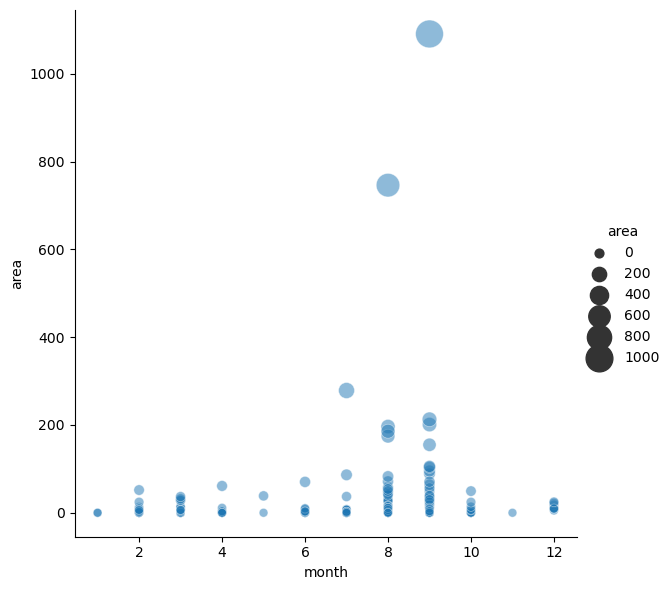

In [79]:
sns.relplot(x="month", y="area", size="area",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=clean_data)

#larget area fire in summer months

C:\Users\UltimateKayCorp\AppData\Local\Temp\ipykernel_18256\3627697206.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="day", y="area", size="area",


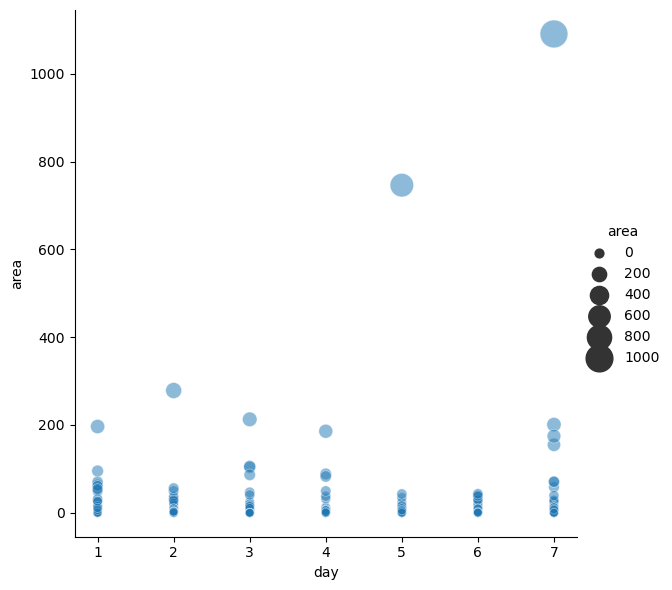

In [80]:
sns.relplot(x="day", y="area", size="area",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=clean_data)

C:\Users\UltimateKayCorp\AppData\Local\Temp\ipykernel_18256\1066587323.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="FFMC", y="DC", size="DMC",


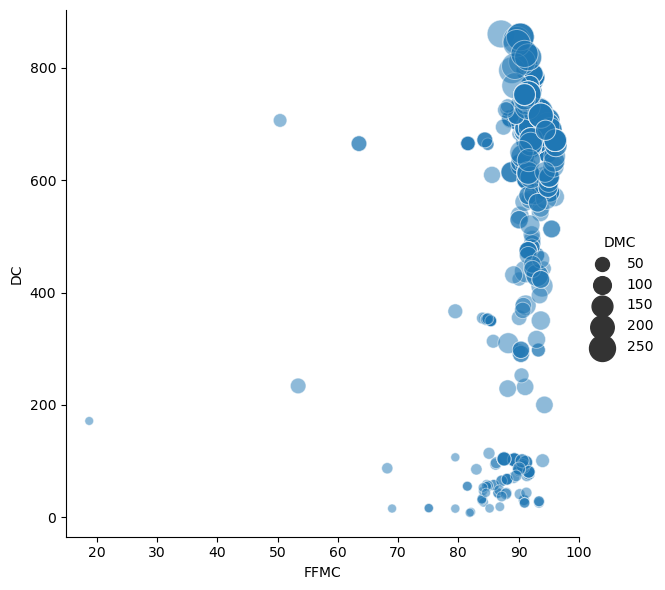

In [110]:
sns.relplot(x="FFMC", y="DC", size="DMC",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=clean_data)

#The higher the FFMC and DC, the higher the DMC

C:\Users\UltimateKayCorp\AppData\Local\Temp\ipykernel_18256\190176552.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="RH", y="temp", size ='area',


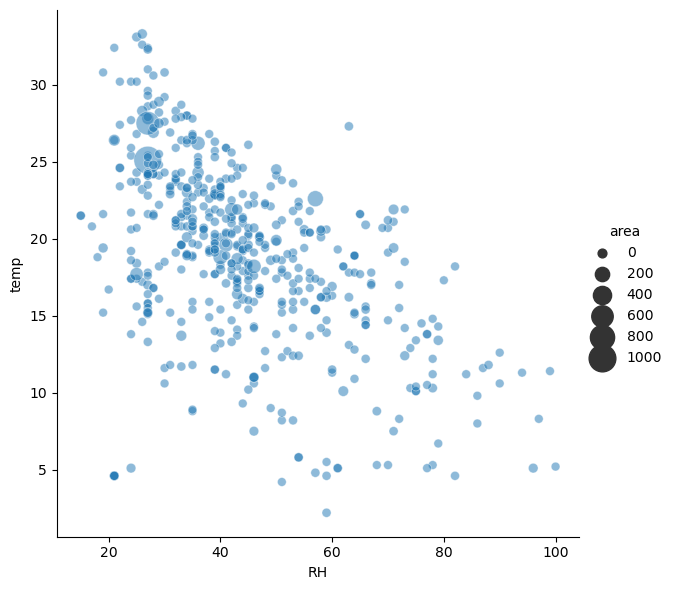

In [111]:
sns.relplot(x="RH", y="temp", size ='area',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=clean_data)

#lower RH, higher temperature, larger area burned

C:\Users\UltimateKayCorp\AppData\Local\Temp\ipykernel_18256\3073118204.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="month", y="DC", size ='area',


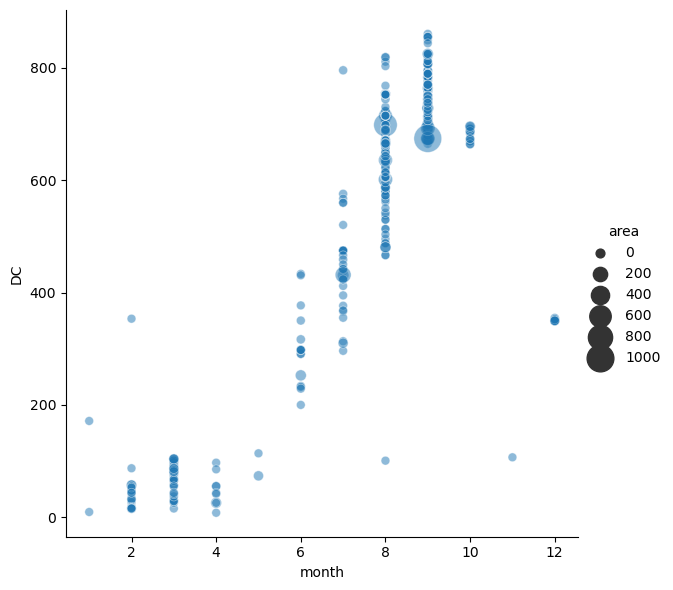

In [127]:
sns.relplot(x="month", y="DC", size ='area',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=clean_data)

C:\Users\UltimateKayCorp\AppData\Local\Temp\ipykernel_18256\1701792793.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="ISI", y="FFMC", size ='area',


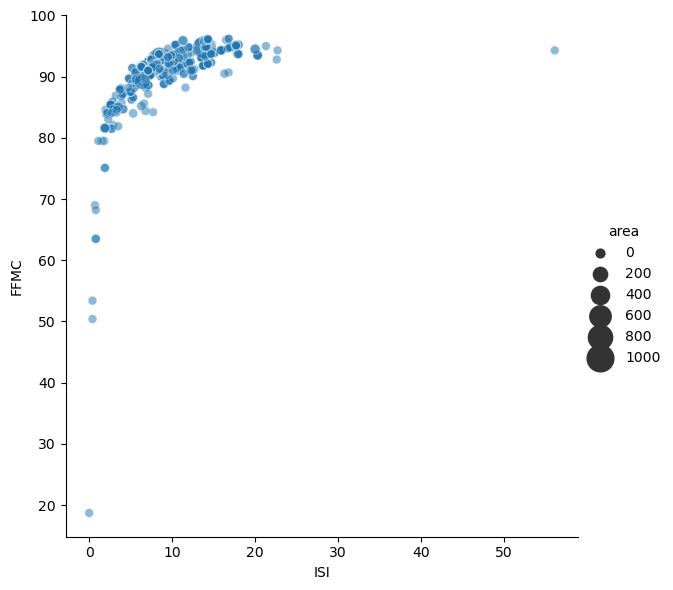

In [128]:
sns.relplot(x="ISI", y="FFMC", size ='area',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=clean_data)

In [ ]:
#The data is now ready to model for predictive analysis!